In [81]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into dataframe df

In [82]:
df = pd.read_csv('/Users/vj/Documents/Data/ML-Hospital-Admission/Dataset/HDHI Admission data.csv')
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df['D.O.D']

D.O.A
2017-04-01      4/3/2017
2017-04-01      4/5/2017
2017-04-01      4/3/2017
2017-04-01      4/8/2017
2017-04-01     4/23/2017
                 ...    
2019-03-31    04/04/2019
2019-03-31      4/1/2019
2019-03-31    09/04/2019
2019-03-31    03/04/2019
2019-03-31    03/04/2019
Name: D.O.D, Length: 15757, dtype: object

Strip spaces in column name

In [83]:
df.columns = df.columns.str.strip()
#check column names after stripping
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


Check D.O.A values, if don't exist, raise keyError

In [84]:
if 'D.O.A' not in df.columns:
    raise KeyError('D.O.A column not found')

Changing dates format for consistent format

In [85]:
def date_parse(str_date):
    for fm in ('%m/%d/%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(str_date, format=fm)
        except ValueError:
            continue
    raise ValueError(f"no format found for this date {str_date}")

df['D.O.A'] = df['D.O.A'].apply(date_parse)

df['D.O.A'].head()
#df.to_csv('/Users/vj/Documents/Data/ML-Hospital-Admission/Dataset/cleaned_HDHI_Admission_data.csv')


0   2017-04-01
1   2017-04-01
2   2017-04-01
3   2017-04-01
4   2017-04-01
Name: D.O.A, dtype: datetime64[ns]

set D.O.A as the index

In [86]:
df.set_index('D.O.A', inplace=True)
df.head()

,SNO,MRD No.,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
D.O.A,,,,,,,,,,,,,,,,,,,,,
2017-04-01,1,234735,4/3/2017,81,M,R,E,Apr-17,3,2,...,0,0,0,0,0,0,0,0,0,0
2017-04-01,2,234696,4/5/2017,65,M,R,E,Apr-17,5,2,...,0,0,0,0,0,0,0,0,0,0
2017-04-01,3,234882,4/3/2017,53,M,U,E,Apr-17,3,3,...,0,0,0,0,0,0,0,0,0,0
2017-04-01,4,234635,4/8/2017,67,F,U,E,Apr-17,8,6,...,0,0,0,0,0,0,0,0,0,0
2017-04-01,5,234486,4/23/2017,60,F,U,E,Apr-17,23,9,...,0,0,0,0,0,0,0,0,0,0


Aggregate admissions per day

In [87]:
per_day_admissions = df.groupby(df.index).size().reset_index(name='admissions')
per_day_admissions.to_csv('/Users/vj/Documents/Data/ML-Hospital-Admission/Dataset/per_day_admissions.csv')
per_day_admissions

,D.O.A,admissions
0,2017-01-04,1
1,2017-01-10,2
2,2017-01-11,2
3,2017-01-12,11
4,2017-02-04,2
...,...,...
760,2019-11-02,32
761,2019-11-03,25
762,2019-12-01,6
763,2019-12-02,19


plot data

<function matplotlib.pyplot.show(close=None, block=None)>

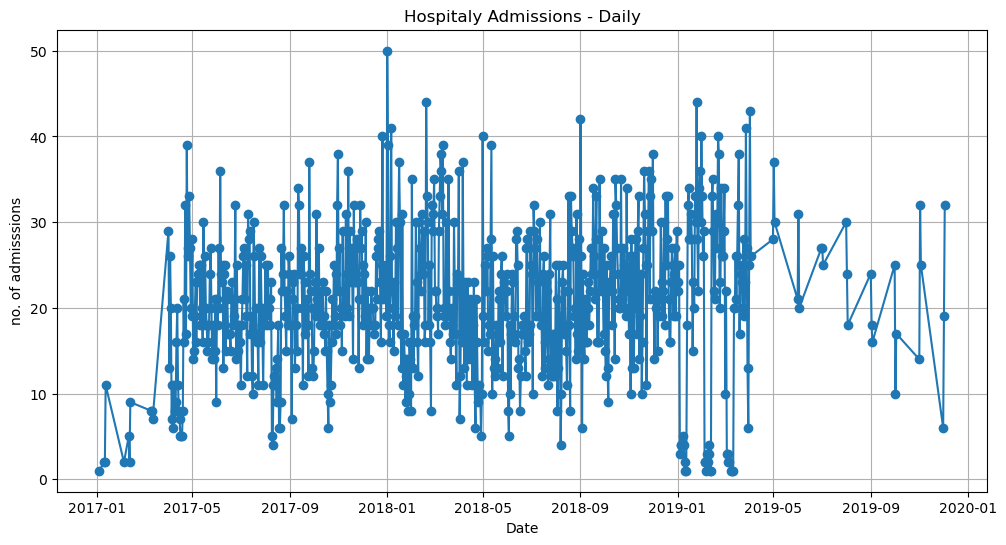

In [88]:
plt.figure(figsize=(12,6))
plt.plot(per_day_admissions['D.O.A'], per_day_admissions['admissions'], marker='o', linestyle = '-')
plt.title("Hospitaly Admissions - Daily")
plt.xlabel('Date')
plt.ylabel('no. of admisssions')
plt.grid(True)
plt.show

In [93]:
type(per_day_admissions['D.O.A'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [103]:
df2 = pd.read_csv('/Users/vj/Documents/Data/ML-Hospital-Admission/Dataset/per_day_admissions.csv')
type(df2['admissions'][0])

numpy.int64